# **Author : Nikita Sawant**

## Technical TASK 1 :- Prediction using Supervised ML (Level- Beginne)

In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.<br>
This is a simple linear regression task as it involves just two variables.


In [1]:
### Importing all libraries required in this notebook
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Step- 1 Reading data from online source

In [22]:
### Reading data from remote link
data = pd.read_csv("http://bit.ly/w-data")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [23]:
## check the shape of the data
data.shape

(25, 2)

In [4]:
## check the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
## check the description
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Step- 2 Data Visualization

Now let's plot a graph of our data so that it will give us clear ides about data

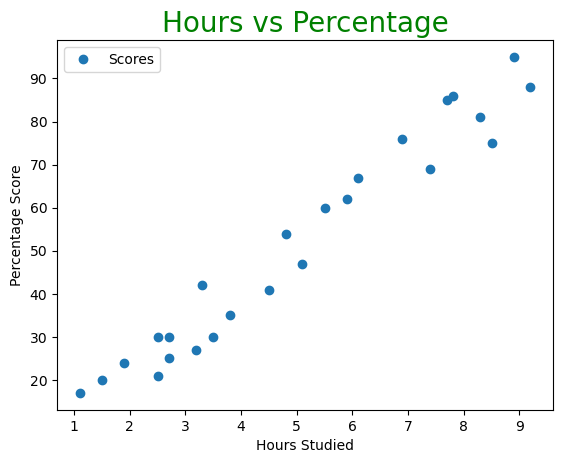

In [12]:
# ploting the distribuation of score
data.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title('Hours vs Percentage', color ="Green" , fontsize = "20")
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Step- 3 Preparing the Data

Now we prepare the data and split it in test data

In [20]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, test_size=0.20, random_state=42 )

#### Training the model

In [21]:
linearRegressor = LinearRegression()
linearRegressor.fit(x_train, y_train)
y_predict_train = linearRegressor.predict(x_train)

### Step- 4 Algorithm Training

Now the spliting of our data into training and testing sets is done, now it's time to train our algorithm.

In [24]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Training Complete.")

Training Complete.


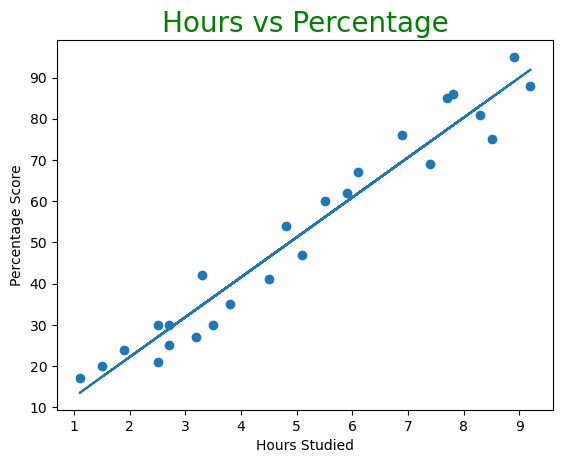

In [25]:
### Plotting the regression line
line = regressor.coef_*x+regressor.intercept_
## Plotting for the test data
plt.scatter(x,y)
plt.plot(x, line);
plt.title('Hours vs Percentage', color ="Green" , fontsize = "20")
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### Step- 5 Making prediction

Now that we have trained our algorithm, it's time to make some predictions.


In [26]:
### Testing data - In hours
print(x_test)

### Predicting the scores
y_predict = regressor.predict(x_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


### Step- 6 Comparing Actual vs Predicted

In [27]:
### Comparing Actual vs Predicted
data = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_predict})

In [28]:
data

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [29]:
### Estimating the Training Data and Test Data Score
print("Training score:", regressor.score(x_train, y_train))
print("Testing score:", regressor.score(x_test, y_test))

Training score: 0.9491209376364416
Testing score: 0.9678055545167994


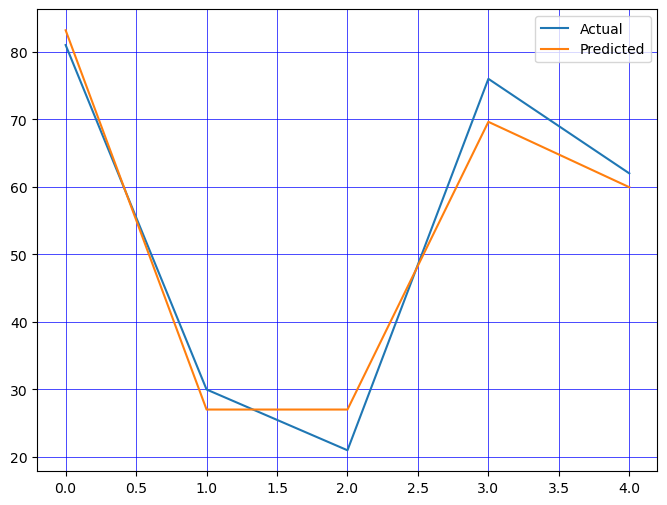

In [30]:
### Plotting the line graph to depict the difference between the actual and predicted value.
data.plot(kind = 'line', figsize = (8,6))
plt.grid(which = 'major', linewidth ='0.5', color = 'black')
plt.grid(which = 'major', linewidth ='0.5', color= 'blue')
plt.show()

In [31]:
### Testing your own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print ("No. of hours = {}".format(hours))
print ("Predicted Score = {}".format (own_pred[0]))

No. of hours = 9.25
Predicted Score = 92.38611528261494


### Step - 7 Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different<br>
algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [33]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Absolute Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root mean squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))


Mean Absolute Error: 3.9207511902099244
Mean Absolute Error: 18.943211722315272
Root mean squared Error: 4.352380006653288
